# Peer-graded Assignment: Project Submission

Project Rubric
After submitting your PDF, you will complete 3 peer reviews using the Project Rubric provided. Three other peers will also review your project using the same rubric. Take a minute to make sure your work is polished and fits the guidelines of the project before submitting.

For your very first project in this Python Data Products Specialization, you will be the author of your very own notebook which will extract and visualize basic statistics from a dataset of your own choosing. Here is how you will be graded on your project. Review this rubric to make sure you have enough comments and explanations in your notebook!

### Project: Stock Market Analysis and Prediction

## Stock Market Data From Yahoo Finance


The technology sector is the category of stocks relating to the research, development and/or distribution of technologically based goods and services. This sector contains businesses revolving around the manufacturing of electronics, creation of software, computers or products and services relating to information technology. 

The technology sector is often the most attractive investment destination in any economy. The U.S. technology sector boasts of companies like Apple, Google, Amazon, Facebook, Netflix, IBM, and Microsoft. These companies drive the growth in the tech sector and the fervor around their long term potential has them trading at price-to-earnings multiples that look ridiculous compared to almost every other sector.

A large amount of this growth owes a debt to the buzz factor that technology companies seem to effortlessly create by launching whole new business lines that have never existed before.

Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Google Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. 

## Familiarize with Data set 


In this project, we'll analyse data from the stock market for some technology stocks.

Again, we'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history.

Here are the questions we'll try to answer:

In this analysis, I would like to explore the following questions.

* What was the change in price of the stock over time?
* What was the daily return of the stock on average?
* What was the moving average of the various stocks?
* What was the correlation between different stocks' closing prices?
* What was the correlation between different stocks' daily returns?
* How much value do we put at risk by investing in a particular stock?
* How can we attempt to predict future stock behavior?

In [35]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

 In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [36]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [39]:
# List of Tech_stocks for analytics
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [40]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-26,195.960007,193.610001,194.610001,194.210007,19076000.0,191.298080
2018-07-27,195.190002,190.100006,194.990005,190.979996,24024000.0,188.116501
2018-07-30,192.199997,189.070007,191.899994,189.910004,21029500.0,187.062546
2018-07-31,192.139999,189.339996,190.300003,190.289993,39373000.0,187.436829
2018-08-01,201.759995,197.309998,199.130005,201.500000,67935700.0,198.478760


# Simple Statistics

In [142]:
# Summery stats for Apple Stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,243.000000,233.000000,203.000000,153.000000,251.000000
mean,194.851786,190.918611,192.846389,192.933334,3.251683e+07,191.661209,192.610984,192.059389,189.868311,184.972090,0.000462
std,21.860894,21.694723,21.744274,21.757994,1.386991e+07,21.351974,21.582020,21.280110,18.822234,9.677529,0.019657
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,141.039642,150.653999,152.764500,160.890800,172.019300,-0.099607
25%,175.967499,173.747501,174.872501,174.832497,2.308030e+07,174.111996,175.518502,174.816000,173.350500,176.610600,-0.008952
50%,197.434998,193.605003,195.695000,195.460007,2.942395e+07,194.874649,196.242001,193.834000,193.590800,183.622600,0.001652
75%,210.074997,207.147499,209.312500,208.872498,3.876472e+07,207.565552,208.715501,208.694002,197.242200,191.625100,0.010663
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090,226.264000,223.456001,221.320001,206.995701,0.070422


In [143]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-07-26 to 2019-07-26
Data columns (total 11 columns):
High               252 non-null float64
Low                252 non-null float64
Open               252 non-null float64
Close              252 non-null float64
Volume             252 non-null float64
Adj Close          252 non-null float64
MA for 10 days     243 non-null float64
MA for 20 days     233 non-null float64
MA for 50 days     203 non-null float64
MA for 100 days    153 non-null float64
Daily Return       251 non-null float64
dtypes: float64(11)
memory usage: 23.6 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the AAPL(Apple) stocks.

## Plotting the data

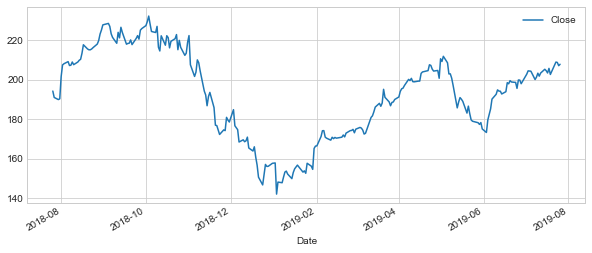

In [144]:

# Let's see a historical view of the closing price
AAPL['Close'].plot(legend=True, figsize=(10,4))

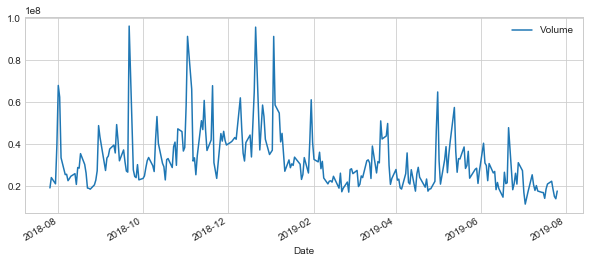

In [145]:
# Now let's plot the total volume of stock being traded each day over the past year

AAPL['Volume'].plot(legend=True, figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day for AAPL stock. Let's go ahead and caculate the moving average for the AAPL stock.

For more info on the Moving Average(SMA & EMA) check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [148]:

# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = Series.rolling(AAPL['Close'],ma).mean()
   

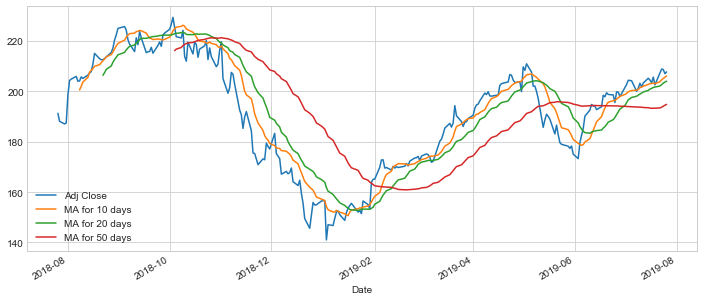

In [149]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

### Daily Return Analysis¶
Now, that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock.

In order to do so, we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the APPL stock.

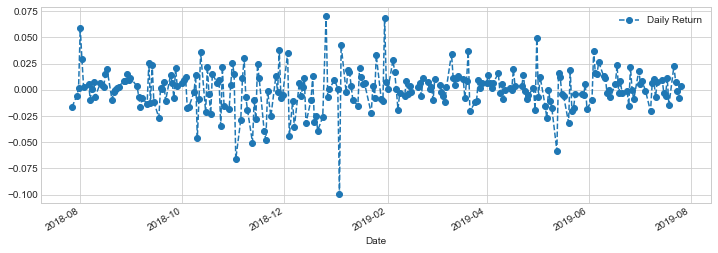

In [150]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

Great, now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

In [151]:
AAPL['Daily Return'].tail()

Date
2019-07-22    0.022854
2019-07-23    0.007818
2019-07-24   -0.000814
2019-07-25   -0.007907
2019-07-26    0.003478
Name: Daily Return, dtype: float64

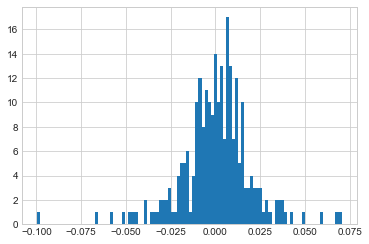

In [152]:
# only with histogram
AAPL['Daily Return'].hist(bins=100)

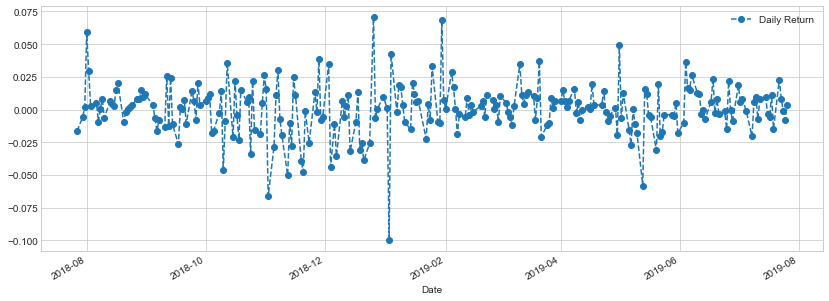

In [153]:

#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


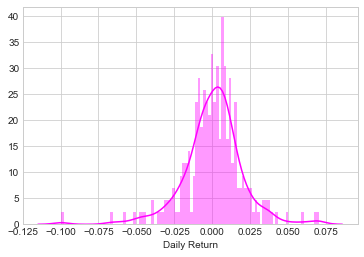

In [154]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta')

## What was the correlation between daily returns of different stocks??

In [155]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df = DataReader(tech_list, 'yahoo', start, end)['Close']

In [158]:
closingprice_df.tail()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2019-07-22,207.220001,1985.630005,1139.209961,138.429993
2019-07-23,208.839996,1994.489990,1148.050049,139.289993
2019-07-24,208.669998,2000.810059,1139.729980,140.720001
2019-07-25,207.020004,1973.819946,1135.939941,140.190002
2019-07-26,207.740005,1943.050049,1245.219971,141.339996


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the APPL stock.

In [72]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [159]:
tech_returns.tail()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2019-07-22,0.022854,0.010746,0.006769,0.013248
2019-07-23,0.007818,0.004462,0.007760,0.006213
2019-07-24,-0.000814,0.003169,-0.007247,0.010266
2019-07-25,-0.007907,-0.013490,-0.003325,-0.003766
2019-07-26,0.003478,-0.015589,0.096202,0.008203


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


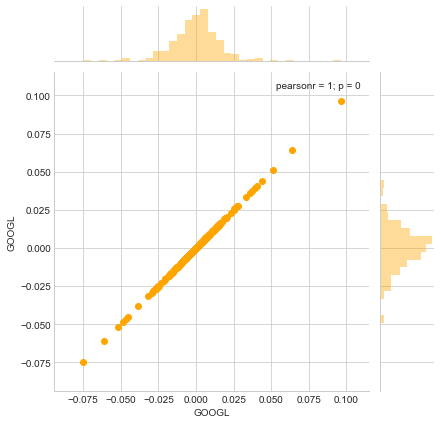

In [75]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOGL','GOOGL',tech_returns,kind='scatter',color='orange')


As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Google and Apple's daily returns.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


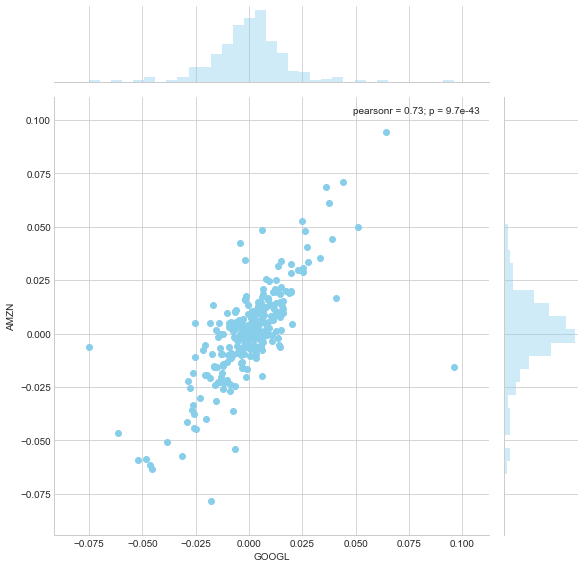

In [161]:
# We'll use joinplot to compare the daily returns of Google and Amazon.

sns.jointplot('GOOGL','AMZN',tech_returns, kind='scatter',size=8, color='skyblue')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


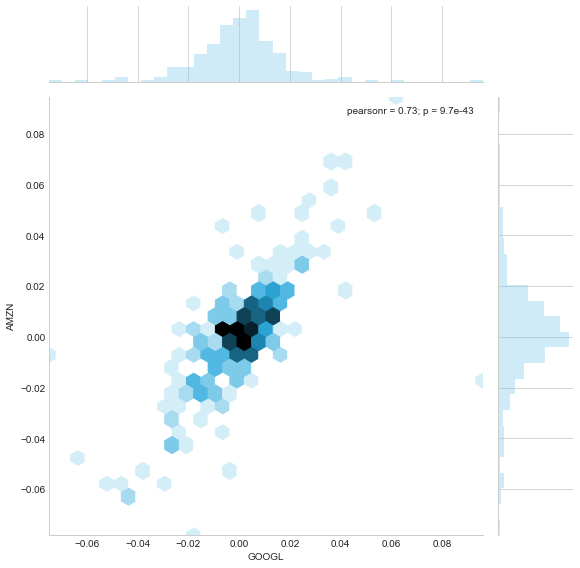

In [162]:
# with Hex plot
sns.jointplot('GOOGL','AMZN',tech_returns, kind='hex',size=8, color='skyblue')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


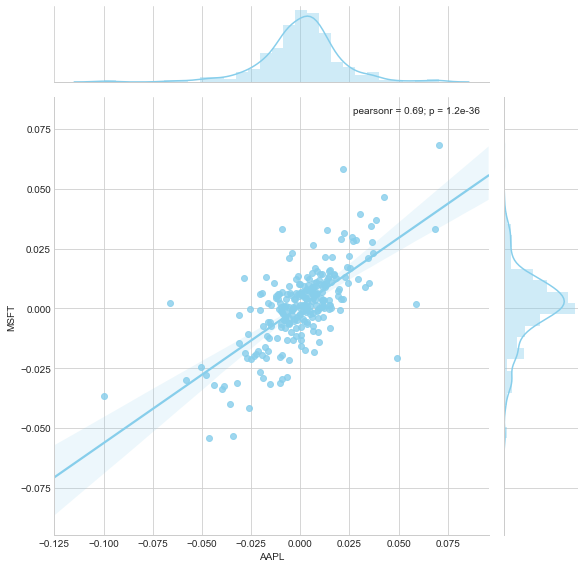

In [163]:
# Lets check out for Apple and Microsoft with reg jointplot
sns.jointplot('AAPL','MSFT',tech_returns, kind='reg', size=8, color='skyblue')


Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

Url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

In [164]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

<IPython.core.display.SVG object>

Seaborn and Pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

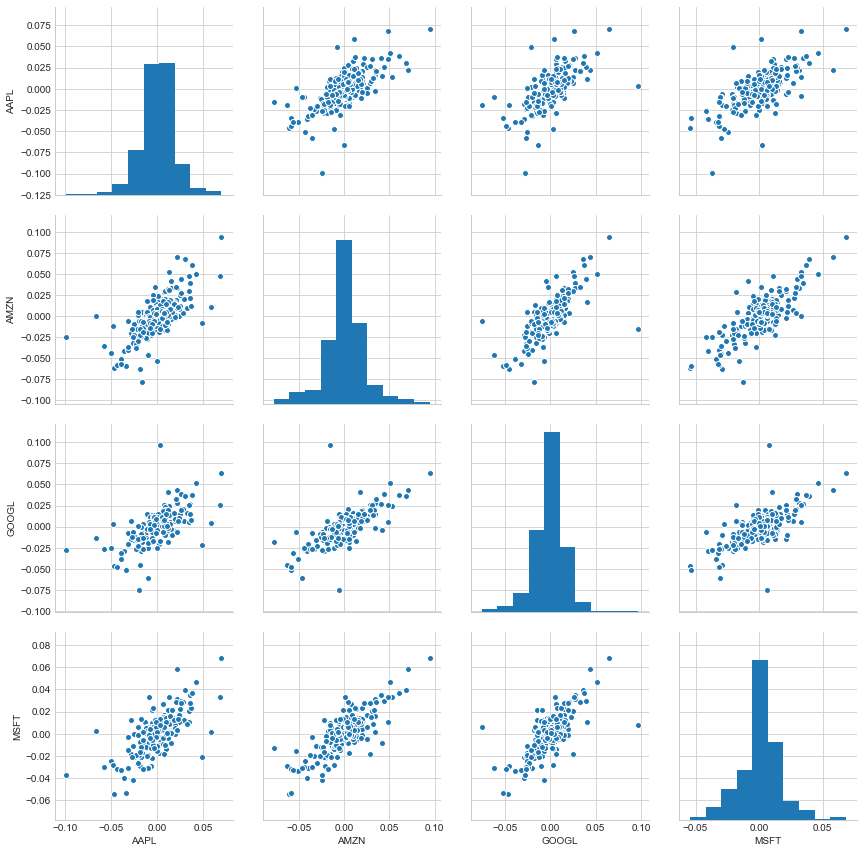

In [165]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),size=3)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle.

Below is an example of utilizing the full power of seaborn to achieve this result.

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

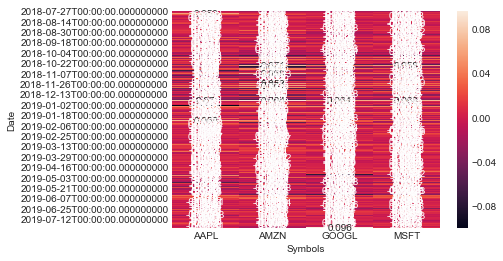

In [171]:

sns.heatmap(tech_returns.dropna(),annot=True)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


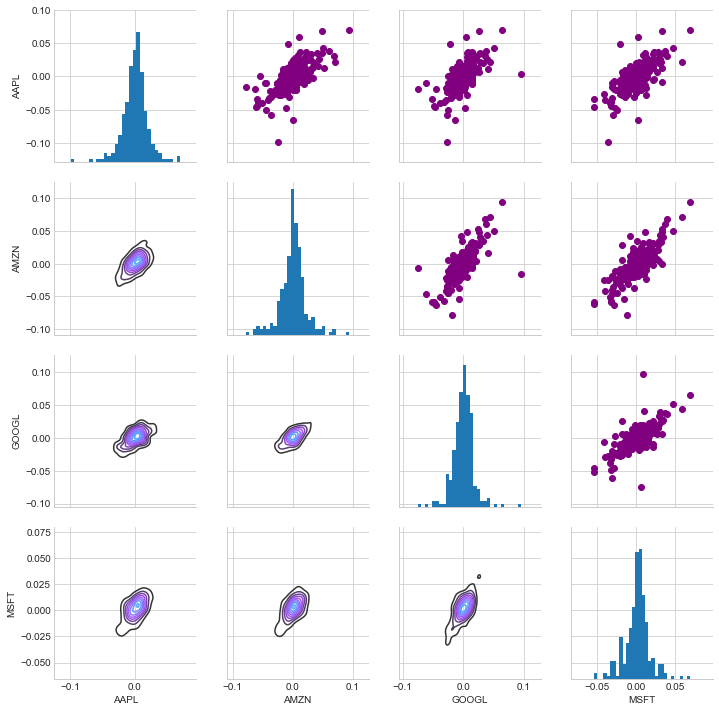

In [172]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


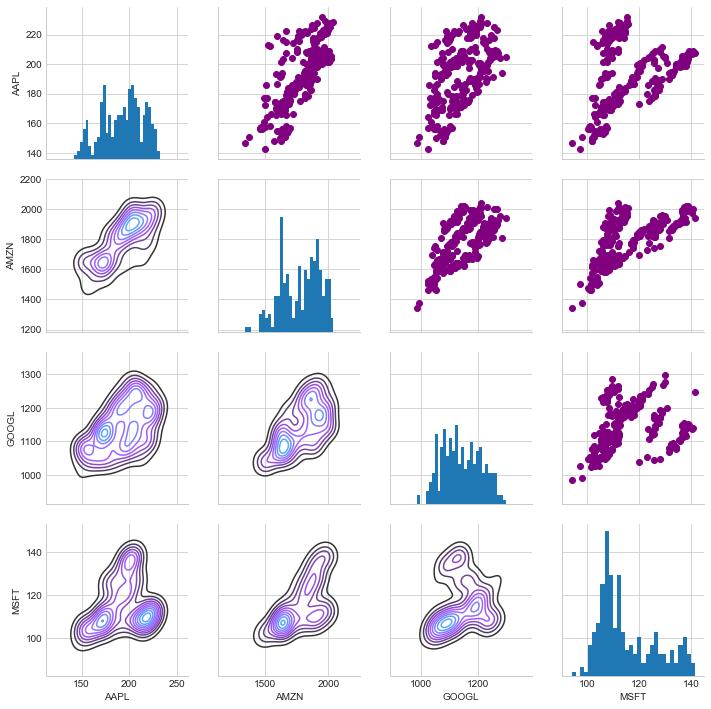

In [173]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Amazon stocks.

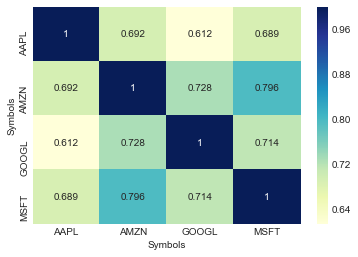

In [174]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

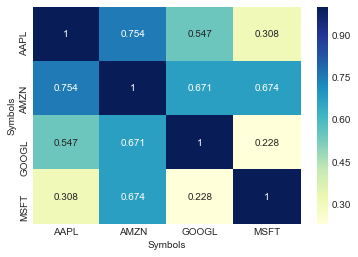

In [175]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')


Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.
Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

Risk Analysis
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).


## How much value do we put at risk by investing in a particular stock?
A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

In [176]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [178]:
rets.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-07-27,-0.016632,0.005127,-0.025368,-0.017698
2018-07-30,-0.005603,-0.020938,-0.018238,-0.021452
2018-07-31,0.002001,-0.001000,-0.002293,0.006738
2018-08-01,0.058910,0.011100,0.004702,0.001885
2018-08-02,0.029231,0.020677,0.006602,0.012138


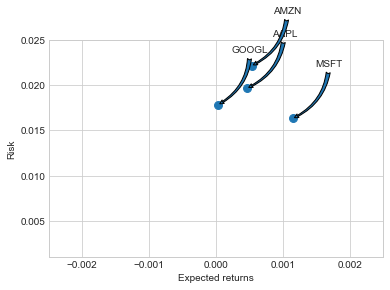

In [179]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


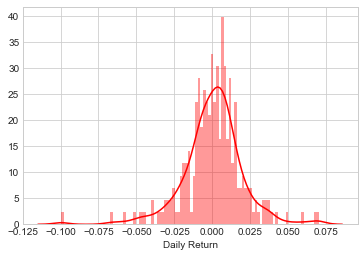

In [180]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

In [181]:
rets.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-07-27,-0.016632,0.005127,-0.025368,-0.017698
2018-07-30,-0.005603,-0.020938,-0.018238,-0.021452
2018-07-31,0.002001,-0.001000,-0.002293,0.006738
2018-08-01,0.058910,0.011100,0.004702,0.001885
2018-08-02,0.029231,0.020677,0.006602,0.012138


In [182]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.031230786606883

The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not exceed 2.57% (of the investment).

In [183]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.026199197231560667

In [184]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.02934527542838905

## How can we attempt to predict future stock behaviour?¶
Monte Carlo Method

Check out this link for more info on the Monte Carlo method. In short: in this method, we run simulations to predict the future many times, and aggregate the results in the end for some quantifiable value.

Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Google stock DataFrame GOOGL

In [94]:
rets.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-07-27,-0.016632,0.005127,-0.025368,-0.017698
2018-07-30,-0.005603,-0.020938,-0.018238,-0.021452
2018-07-31,0.002001,-0.001000,-0.002293,0.006738
2018-08-01,0.058910,0.011100,0.004702,0.001885
2018-08-02,0.029231,0.020677,0.006602,0.012138


In [95]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [96]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


In [97]:
# For Google Stock - GOOGL
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-26,1287.400024,1263.000000,1267.180054,1285.500000,2734300,1285.500000
2018-07-27,1291.439941,1244.489990,1289.119995,1252.890015,2418100,1252.890015
2018-07-30,1252.890015,1224.170044,1245.050049,1230.040039,2194800,1230.040039
2018-07-31,1241.209961,1216.189941,1231.709961,1227.219971,1969100,1227.219971
2018-08-01,1245.900024,1224.939941,1239.109985,1232.989990,1849700,1232.989990


Text(0.5,1,'Monte Carlo Analysis for Google')

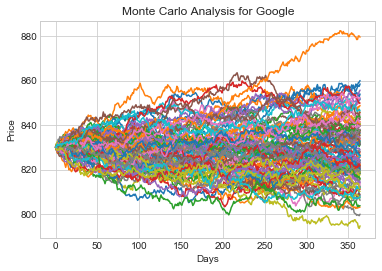

In [98]:
start_price = 830.09

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [99]:

# For Amazon Stock - AMZN
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-26,1844.680054,1804.500000,1839.000000,1808.000000,9924400,1808.000000
2018-07-27,1880.050049,1806.530029,1876.050049,1817.270020,9681000,1817.270020
2018-07-30,1829.500000,1766.020020,1827.329956,1779.219971,6562300,1779.219971
2018-07-31,1801.829956,1739.319946,1786.489990,1777.439941,5738700,1777.439941
2018-08-01,1798.439941,1776.020020,1784.000000,1797.170044,4153100,1797.170044


Text(0.5,1,'Monte Carlo Analysis for Amazon')

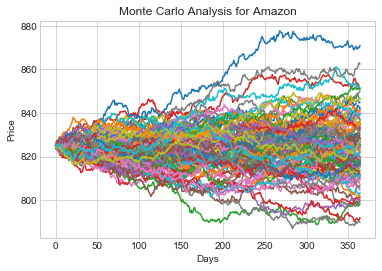

In [100]:
start_price = 824.95

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [101]:
# For Apple Stock - AAPL
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2018-07-26,195.960007,193.610001,194.610001,194.210007,19076000.0,191.298080,NaN,NaN,NaN,NaN,NaN
2018-07-27,195.190002,190.100006,194.990005,190.979996,24024000.0,188.116501,NaN,NaN,NaN,NaN,-0.016632
2018-07-30,192.199997,189.070007,191.899994,189.910004,21029500.0,187.062546,NaN,NaN,NaN,NaN,-0.005603
2018-07-31,192.139999,189.339996,190.300003,190.289993,39373000.0,187.436829,NaN,NaN,NaN,NaN,0.002001
2018-08-01,201.759995,197.309998,199.130005,201.500000,67935700.0,198.478760,NaN,NaN,NaN,NaN,0.058910


Text(0.5,1,'Monte Carlo Analysis for Apple')

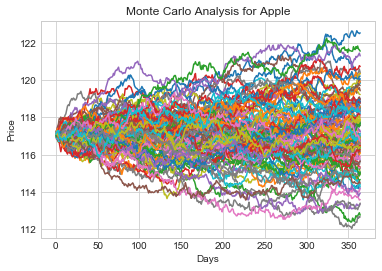

In [102]:
start_price = 117.10

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [103]:

# For Microsoft Stock - MSFT
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-26,111.000000,109.500000,110.739998,109.620003,31372100.0,107.868378
2018-07-27,110.180000,106.139999,110.180000,107.680000,37005300.0,105.959373
2018-07-30,107.529999,104.760002,107.190002,105.370003,34668300.0,103.686295
2018-07-31,106.720001,105.379997,106.489998,106.080002,27655200.0,104.384949
2018-08-01,106.449997,105.419998,106.029999,106.279999,23628700.0,104.581749


Text(0.5,1,'Monte Carlo Analysis for Microsoft')

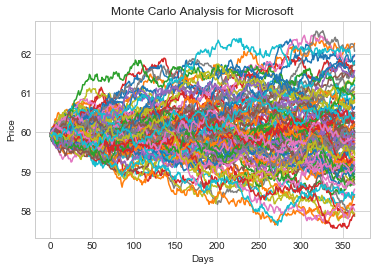

In [104]:
start_price = 59.94

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')


We can infer from this that, Google's stock is pretty stable. T

Text(0.5,1,'Final price distribution for Google Stock(GOOGL) after 365 days')

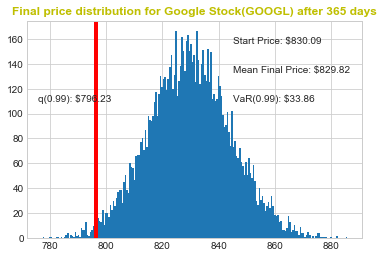

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $17.98 for every investment of 830.09 (The price of one initial Google Stock).

This basically means for every initial GOOGL stock you purchase you're putting about $17.98 at risk 99% of the time from our Monte Carlo Simulation.

In [188]:
# For Amazon Stock Price
start_price = 824.95

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Amazon Stock(AMZN) after 365 days')

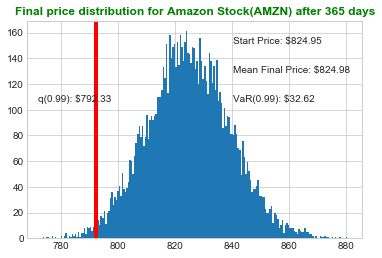

In [189]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for Amazon Stock(AMZN) after %s days" % days, weight='bold', color='G')


This basically means for every initial AMZN stock you purchase you're putting about $18.13 at risk 99% of the time from our Monte Carlo Simulation.

In [190]:
# For Apple Stock Price
start_price = 117.10

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Apple Stock(AAPL) after 365 days')

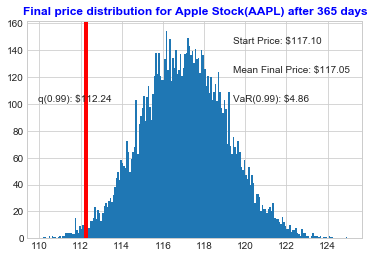

In [114]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for Apple Stock(AAPL) after %s days" % days, weight='bold', color='B')


Great! This basically means for every initial AAPL stock you purchase you're putting about $2.48 at risk 99% of the time from our Monte Carlo Simulation.

In [191]:
# For Microsoft Stock Price
start_price = 59.94

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Microsoft Stock(MSFT) after 365 days')

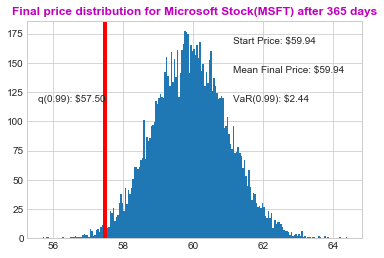

In [193]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for Microsoft Stock(MSFT) after %s days" % days, weight='bold', color='M')


Nice, This basically means for every initial MSFT stock you purchase you're putting about $1.28 at risk 99% of the time from our Monte Carlo Simulation.



From the anaylsis it seems gogole is safe to trade for stock.